In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
df = pd.read_csv('Dataset/processed_data.csv')



In [2]:
fn = df.keys().tolist() [:-1]
X=df[fn]
y=df['NObeyesdad']

In [5]:
from sklearn.preprocessing import LabelEncoder
# encoding CAEC and CALC uniformly
encoding_mapping = {'10-15': 0, '16-20': 1, '21-25': 2 , '26-30' : 3 , '31+' : 4}

X.loc[:,'Age'] = X['Age'].map(encoding_mapping)

Train Size: 60%, Criterion: gini, Accuracy: 0.38
Classification Report:
               precision    recall  f1-score   support

         1.0       0.28      0.27      0.27       119
         2.0       0.51      0.51      0.51       211
         3.0       0.16      0.17      0.16        71

    accuracy                           0.38       401
   macro avg       0.32      0.32      0.32       401
weighted avg       0.38      0.38      0.38       401



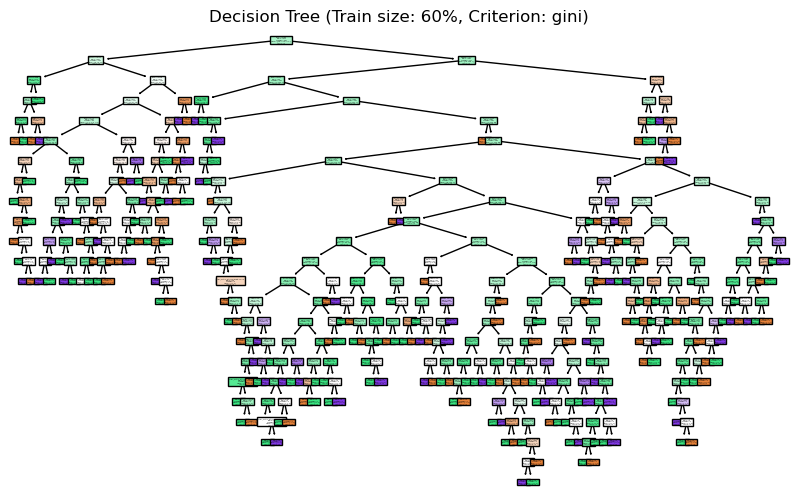

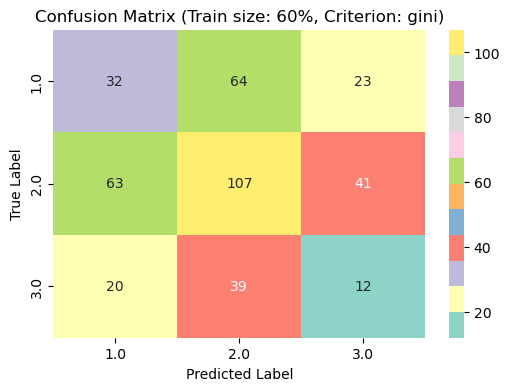

Train Size: 60%, Criterion: entropy, Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

         1.0       0.29      0.22      0.25       119
         2.0       0.52      0.62      0.57       211
         3.0       0.17      0.14      0.15        71

    accuracy                           0.42       401
   macro avg       0.33      0.33      0.32       401
weighted avg       0.39      0.42      0.40       401



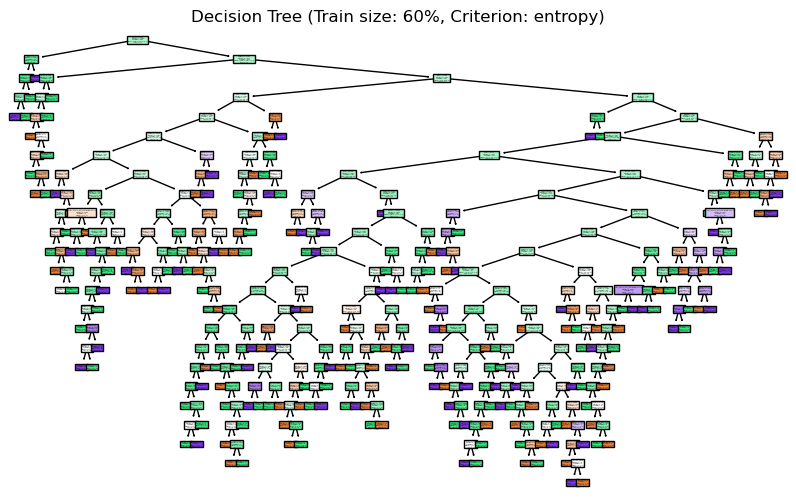

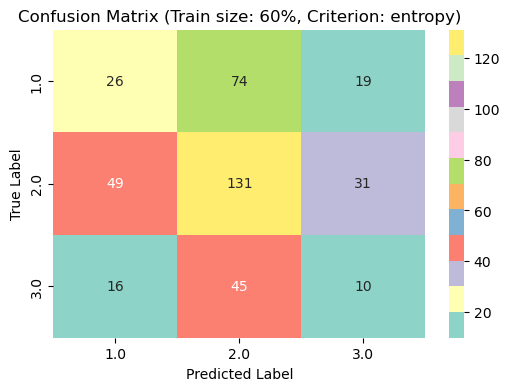

Train Size: 70%, Criterion: gini, Accuracy: 0.40
Classification Report:
               precision    recall  f1-score   support

         1.0       0.25      0.22      0.24        90
         2.0       0.53      0.56      0.55       160
         3.0       0.19      0.20      0.19        51

    accuracy                           0.40       301
   macro avg       0.32      0.33      0.33       301
weighted avg       0.39      0.40      0.39       301



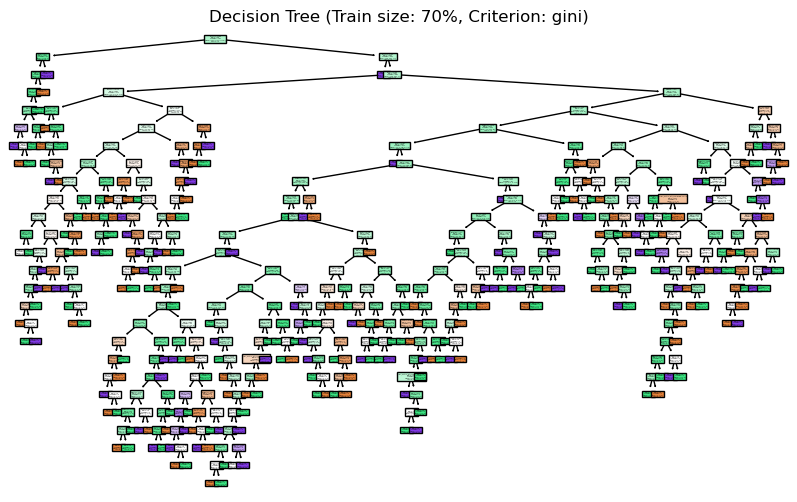

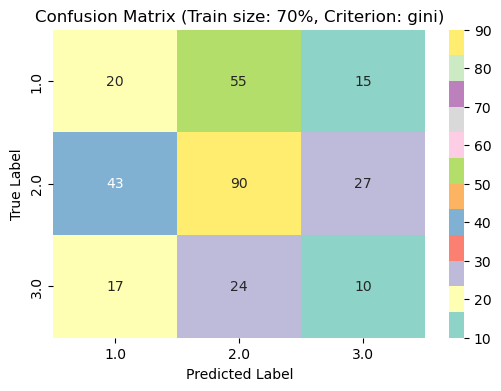

Train Size: 70%, Criterion: entropy, Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

         1.0       0.33      0.32      0.32        90
         2.0       0.54      0.56      0.55       160
         3.0       0.13      0.12      0.12        51

    accuracy                           0.42       301
   macro avg       0.33      0.33      0.33       301
weighted avg       0.41      0.42      0.41       301



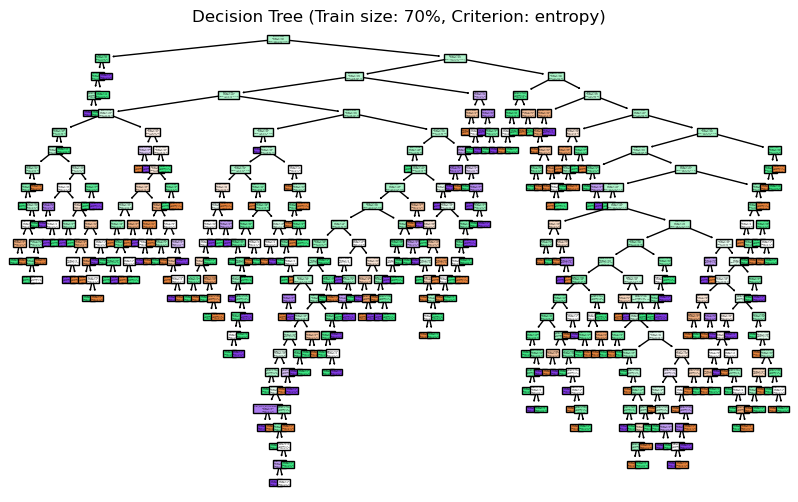

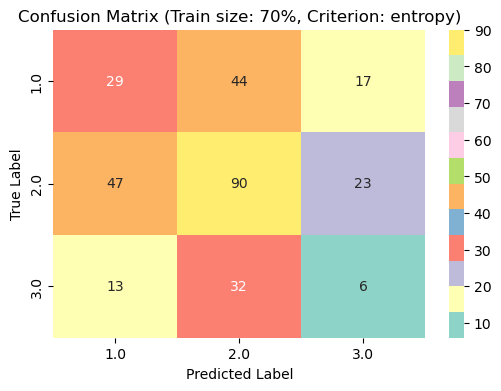

Train Size: 80%, Criterion: gini, Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

         1.0       0.28      0.31      0.29        59
         2.0       0.54      0.54      0.54       112
         3.0       0.25      0.20      0.22        30

    accuracy                           0.42       201
   macro avg       0.36      0.35      0.35       201
weighted avg       0.42      0.42      0.42       201



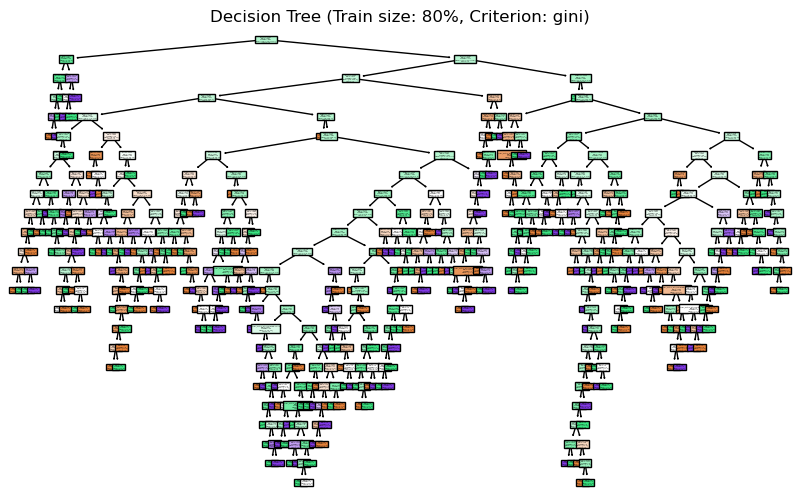

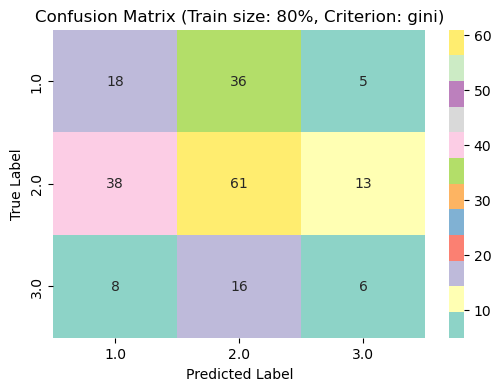

Train Size: 80%, Criterion: entropy, Accuracy: 0.40
Classification Report:
               precision    recall  f1-score   support

         1.0       0.30      0.32      0.31        59
         2.0       0.55      0.53      0.54       112
         3.0       0.10      0.10      0.10        30

    accuracy                           0.40       201
   macro avg       0.32      0.32      0.32       201
weighted avg       0.41      0.40      0.41       201



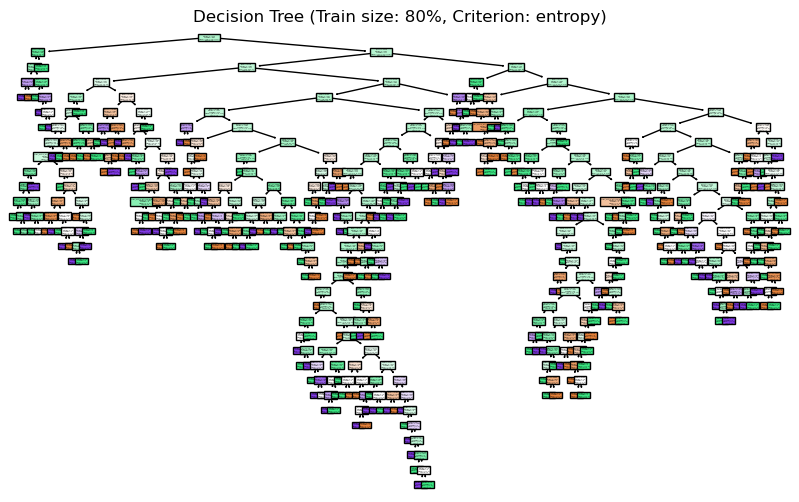

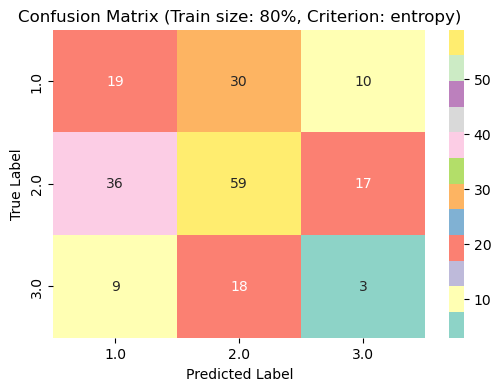

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define partitions (train sizes) and criteria for attribute selection
partitions = [0.6, 0.7, 0.8]  # Different train sizes
criteria = ['gini', 'entropy']  # Selection criteria

# Dictionary to store results for comparison
results = {}

# Loop through each partition and criterion
for train_size in partitions:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    
    for criterion in criteria:
        # Initialize and train the Decision Tree model
        model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store classification report
        results[(train_size, criterion)] = classification_report(y_test, y_pred, output_dict=True)

        # Print accuracy and classification report
        print(f"Train Size: {int(train_size * 100)}%, Criterion: {criterion}, Accuracy: {accuracy:.2f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # Visualize the Decision Tree
        plt.figure(figsize=(10, 6))
        plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()])
        plt.title(f"Decision Tree (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
        plt.show()

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap="Set3", xticklabels=y.unique(), yticklabels=y.unique())
        plt.title(f"Confusion Matrix (Train size: {int(train_size * 100)}%, Criterion: {criterion})")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()